Ranking              0
Librería             0
Porcentaje de Uso    0
Respuestas           7
dtype: int64

Análisis del Modelo de Regresión Lineal:
- La pendiente del modelo (coeficiente) es: -0.19
- El intercepto del modelo es: 2.94

Interpretación del comportamiento:
- El modelo muestra una relación entre el ranking de popularidad y el porcentaje de uso de las librerías.
- El coeficiente de la pendiente (-0.19) sugiere que a medida que aumenta el ranking (menos popularidad), el porcentaje de uso disminuye.
- El intercepto (2.94) indica el valor estimado del porcentaje de uso cuando el ranking es 0, lo cual no es aplicable en el contexto del ranking real, pero es una estimación del modelo.

Análisis más detallado:
- La librería con mayor porcentaje de uso es 5% (886.9999999999999%).
- La librería con menor porcentaje de uso es 11% (1.0%).
- La regresión muestra una disminución progresiva en el porcentaje de uso a medida que disminuye el ranking.
- El análisis sugiere que existe una cor

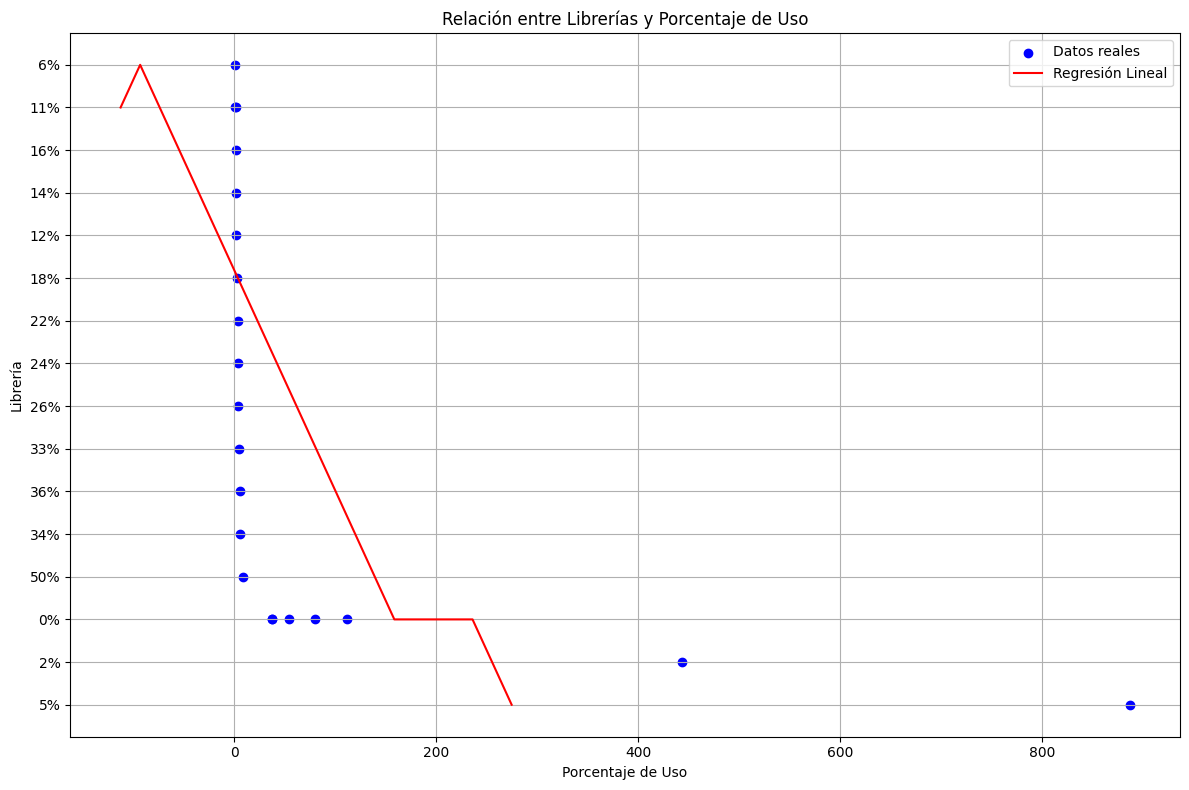

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Leer el archivo CSV con el separador ','
archivo_csv = "Library.csv"  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa
df = pd.read_csv(archivo_csv, sep=",")

# Verificar si hay valores NaN en las columnas
print(df.isnull().sum())

# Convertir "Porcentaje de Uso" a cadenas de texto y luego a números
df["Porcentaje de Uso"] = df["Porcentaje de Uso"].astype(str).str.rstrip('%').astype('float') / 100.0

# Ordenar por "Porcentaje de Uso" y resetear el índice
df = df.sort_values(by="Porcentaje de Uso", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Crear variables independientes y dependientes para el modelo
X = df[["Ranking"]].values
y = df["Porcentaje de Uso"].values

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Analizar el modelo
pendiente = model.coef_[0]
intercepto = model.intercept_

# Imprimir análisis del modelo
print("\nAnálisis del Modelo de Regresión Lineal:")
print(f"- La pendiente del modelo (coeficiente) es: {pendiente:.2f}")
print(f"- El intercepto del modelo es: {intercepto:.2f}")
print("\nInterpretación del comportamiento:")
print(f"- El modelo muestra una relación entre el ranking de popularidad y el porcentaje de uso de las librerías.")
print(f"- El coeficiente de la pendiente ({pendiente:.2f}) sugiere que a medida que aumenta el ranking (menos popularidad), el porcentaje de uso disminuye.")
print(f"- El intercepto ({intercepto:.2f}) indica el valor estimado del porcentaje de uso cuando el ranking es 0, lo cual no es aplicable en el contexto del ranking real, pero es una estimación del modelo.")

# Análisis más detallado según los datos
top_libreria = df.iloc[0]["Librería"]
top_rating = df.iloc[0]["Porcentaje de Uso"]
bottom_libreria = df.iloc[-1]["Librería"]
bottom_rating = df.iloc[-1]["Porcentaje de Uso"]

# Imprimir análisis más detallado
print("\nAnálisis más detallado:")
print(f"- La librería con mayor porcentaje de uso es {top_libreria} ({top_rating * 100}%).")
print(f"- La librería con menor porcentaje de uso es {bottom_libreria} ({bottom_rating * 100}%).")
print(f"- La regresión muestra una disminución progresiva en el porcentaje de uso a medida que disminuye el ranking.")
print(f"- El análisis sugiere que existe una correlación negativa entre el ranking y el porcentaje de uso. Esto es típico en listas de popularidad.")

# Configurar el gráfico con los nombres de las librerías en el eje Y
plt.figure(figsize=(12, 8))
plt.scatter(df["Porcentaje de Uso"] * 100, df["Librería"], color="blue", label="Datos reales")
plt.plot(y_pred * 100, df["Librería"], color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Porcentaje de Uso")
plt.ylabel("Librería")
plt.title("Relación entre Librerías y Porcentaje de Uso")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()